In [1]:
from numpy import mean
from numpy import std

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier

/Users/madhuri/Library/Python/3.8/lib/python/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [3]:
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [79]:
df = pd.read_csv('/Users/madhuri/Desktop/MasterThesis/Part2/Adaboost_input.csv')

In [108]:
df.shape

(3968, 188)

In [109]:
df.drop(['DaysToBirth'], axis=1, inplace=True)

KeyError: "['DaysToBirth'] not found in axis"

In [ ]:
df.columns

In [ ]:
sns.countplot(x='CancerType', data=df )
 # Show the plot
plt.show()

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3968 entries, 0 to 3967
Columns: 188 entries, CancerType to Vulva, NOS
dtypes: float64(1), int64(186), object(1)
memory usage: 5.7+ MB


In [111]:
#Selecting the target column and predictors
target_col = "CancerType"
X = df.loc[:, df.columns != target_col]
y = df.loc[:, target_col]

In [112]:
#using a 67%, 33% split here to see the results
# X_train_1, X_test_1, y_train, y_test = train_test_split(X, y, stratify=y,
#                                                     test_size=0.33, 
#                                                     random_state=42)

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    test_size=0.33, 
                                                    random_state=42)

In [114]:
#encode target variable Yes=1, No=0
le = LabelEncoder()
le.fit(y_train)
y_train= le.transform(y_train)
y_test=le.transform(y_test)

In [115]:
from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(
    class_weight='balanced',y=y_train)
    

#xgb_classifier.fit(X, y, sample_weight=classes_weights)

In [116]:
# estimate a value for the scale_pos_weight xgboost hyperparameter
# from collections import Counter

# # count examples in each class
# counter = Counter(y_train)
# # estimate scale_pos_weight value
# estimate = counter['No'] / counter['Yes']
# print('Estimate: %.3f' % estimate)


In [117]:
#encode target variable Yes=1, No=0
# le = LabelEncoder()
# le.fit(y_train)
# y_train= le.transform(y_train)
# y_test=le.transform(y_test)

In [118]:
# numerical_ix= X_train_1.select_dtypes(include=['int64','float64']).columns
# categorical_ix = X_train_1.select_dtypes(include=['object', 'bool']).columns


In [119]:
# from sklearn.preprocessing import MinMaxScaler
# #one hot encoding categorical predictors
# t=[('cat', OneHotEncoder(handle_unknown='ignore'), categorical_ix), ('num', MinMaxScaler(), numerical_ix)]
# col_transform=ColumnTransformer(transformers=t)
# X_transform=col_transform.fit_transform(X_train_1)

In [120]:
#X_test=col_transform.transform(X_test_1)

In [121]:
# fit balanced xgboost on an imbalanced classification dataset

# define model
model = XGBClassifier()
model.fit(X_train, y_train, sample_weight=classes_weights)
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)


/Users/madhuri/Library/Python/3.8/lib/python/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/madhuri/Library/Python/3.8/lib/python/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:01:26] WARNING: /private/var/folders/24/x047mr1548j2kznx01gymx100000gn/T/pip-install-lxtbnovv/xgboost_8f0ea09e7dee4109a111a900f8002558/build/temp.macosx-10.14-arm64-cpython-38/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [122]:
# summarize performance
print('Mean ROC AUC: %.5f' % mean(scores))

Mean ROC AUC: nan


In [123]:
y_pred=model.predict(X_test)

/Users/madhuri/Library/Python/3.8/lib/python/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [124]:
#y_pred

In [125]:
from sklearn.metrics import confusion_matrix

In [126]:
confusion_matrix(y_test,y_pred)

array([[147,   0,   0,   0,   0,   0,   0,   0],
       [  0, 396,   0,   0,   0,   0,   0,   0],
       [  0,   0, 137,   0,   0,   0,   0,   0],
       [  0,   0,   0, 302,   0,   0,   0,   0],
       [  0,   0,   0,   0,  46,   0,   0,   0],
       [  0,   0,   0,   0,   0, 136,   0,   0],
       [  0,   0,   0,   0,   0,   0, 103,   0],
       [  0,   0,   0,   0,   0,   0,   0,  43]])

In [127]:
from sklearn import metrics
from sklearn.metrics import *

In [128]:
print(metrics.classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

           0      1.000     1.000     1.000       147
           1      1.000     1.000     1.000       396
           2      1.000     1.000     1.000       137
           3      1.000     1.000     1.000       302
           4      1.000     1.000     1.000        46
           5      1.000     1.000     1.000       136
           6      1.000     1.000     1.000       103
           7      1.000     1.000     1.000        43

    accuracy                          1.000      1310
   macro avg      1.000     1.000     1.000      1310
weighted avg      1.000     1.000     1.000      1310



In [129]:
f1_score(y_test, y_pred, average='macro')

1.0

In [130]:
metrics.accuracy_score(y_test,y_pred)*100

100.0

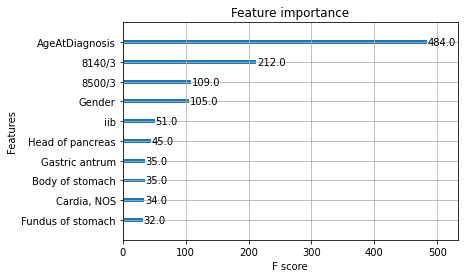

[18:58:19] WARNING: /private/var/folders/24/x047mr1548j2kznx01gymx100000gn/T/pip-install-lxtbnovv/xgboost_8f0ea09e7dee4109a111a900f8002558/build/temp.macosx-10.14-arm64-cpython-38/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:58:24] WARNING: /private/var/folders/24/x047mr1548j2kznx01gymx100000gn/T/pip-install-lxtbnovv/xgboost_8f0ea09e7dee4109a111a900f8002558/build/temp.macosx-10.14-arm64-cpython-38/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:58:30] WARNING: /private/var/folders/24/x047mr1548j2kznx01gymx100000gn/T/pip-install-lxtbnovv/xgboost_8f0ea09e7dee4109a111a900f8002558/build/temp.macosx-10.14-a

/Users/madhuri/Library/Python/3.8/lib/python/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/madhuri/Library/Python/3.8/lib/python/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/madhuri/Library/Python/3.8/lib/python/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(d

[18:58:19] WARNING: /private/var/folders/24/x047mr1548j2kznx01gymx100000gn/T/pip-install-lxtbnovv/xgboost_8f0ea09e7dee4109a111a900f8002558/build/temp.macosx-10.14-arm64-cpython-38/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:58:24] WARNING: /private/var/folders/24/x047mr1548j2kznx01gymx100000gn/T/pip-install-lxtbnovv/xgboost_8f0ea09e7dee4109a111a900f8002558/build/temp.macosx-10.14-arm64-cpython-38/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:58:30] WARNING: /private/var/folders/24/x047mr1548j2kznx01gymx100000gn/T/pip-install-lxtbnovv/xgboost_8f0ea09e7dee4109a111a900f8002558/build/temp.macosx-10.14-a

/Users/madhuri/Library/Python/3.8/lib/python/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/madhuri/Library/Python/3.8/lib/python/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/madhuri/Library/Python/3.8/lib/python/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(d

[18:58:19] WARNING: /private/var/folders/24/x047mr1548j2kznx01gymx100000gn/T/pip-install-lxtbnovv/xgboost_8f0ea09e7dee4109a111a900f8002558/build/temp.macosx-10.14-arm64-cpython-38/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:58:24] WARNING: /private/var/folders/24/x047mr1548j2kznx01gymx100000gn/T/pip-install-lxtbnovv/xgboost_8f0ea09e7dee4109a111a900f8002558/build/temp.macosx-10.14-arm64-cpython-38/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:58:30] WARNING: /private/var/folders/24/x047mr1548j2kznx01gymx100000gn/T/pip-install-lxtbnovv/xgboost_8f0ea09e7dee4109a111a900f8002558/build/temp.macosx-10.14-a

/Users/madhuri/Library/Python/3.8/lib/python/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/madhuri/Library/Python/3.8/lib/python/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/madhuri/Library/Python/3.8/lib/python/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(d

In [131]:
from xgboost import plot_importance
plot_importance(model, max_num_features=10) # top 10 most important features
plt.show()

In [ ]:
#to do next, drop 'tumor stage' and 'vital status' from adaboost in windows laptop and reget 'Adaboost_input.csv'